In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [27]:
df_backup = pd.read_csv('appdata10.csv', parse_dates=['first_open', 'enrolled_date'])
df = df_backup.copy()

# EDA

In [28]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [29]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.hour = df.hour.str.slice(0,3).astype(int)

In [31]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df2 = df.drop(['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'], axis=1)
df2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


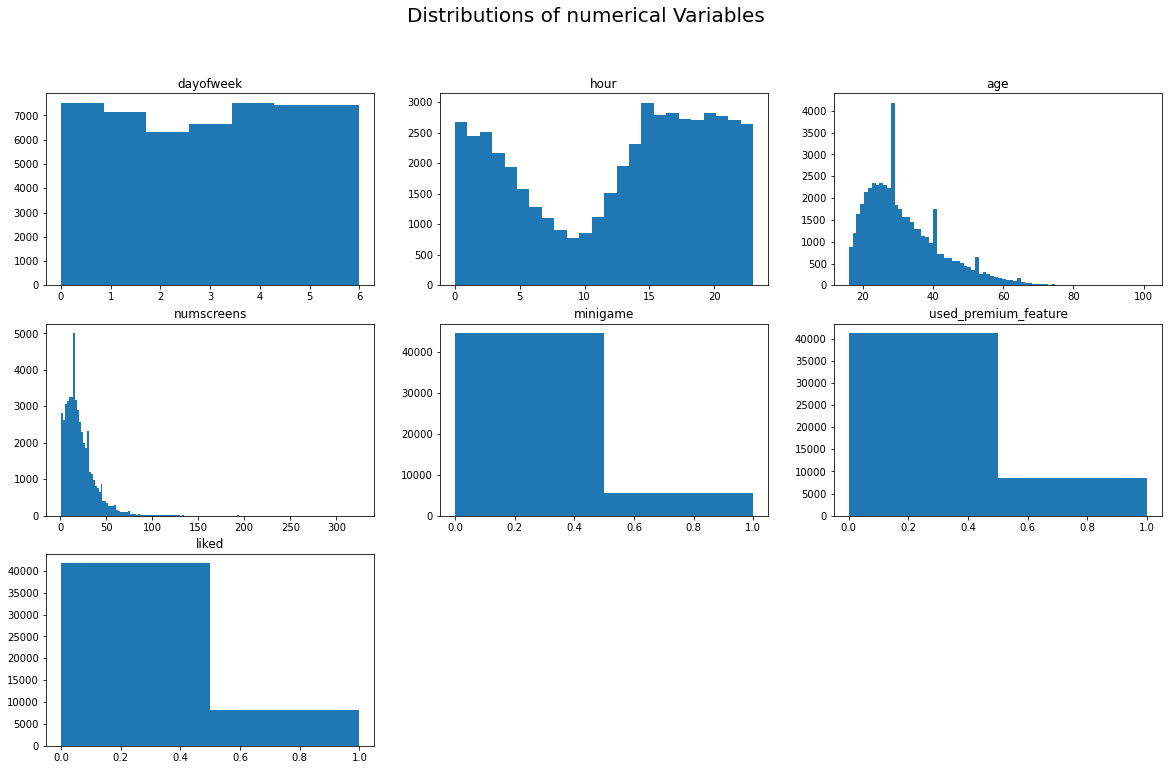

In [40]:
plt.figure(figsize = (20, 12))
plt.suptitle('Distributions of numerical Variables', fontsize = 20)
for i in range(1, df2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(df2.columns.values[i-1])
    
    vals = np.size(df2.iloc[:, i-1].unique())
    
    plt.hist(df2.iloc[:, i-1], bins = vals)

<AxesSubplot:title={'center':'Numerical Values correlation with Enrolled'}>

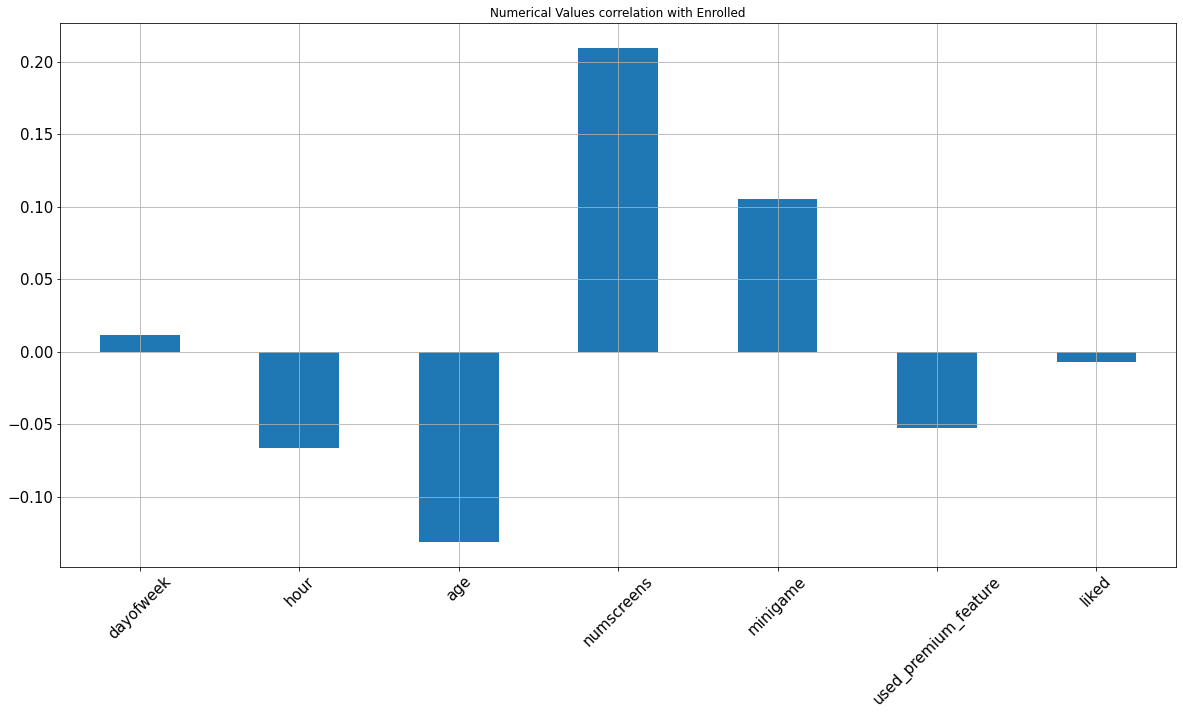

In [41]:
df2.corrwith(df.enrolled).plot.bar(figsize=(20,10),
                                  title = 'Numerical Values correlation with Enrolled',
                                  fontsize = 15, rot = 45,
                                  grid = True)

<AxesSubplot:>

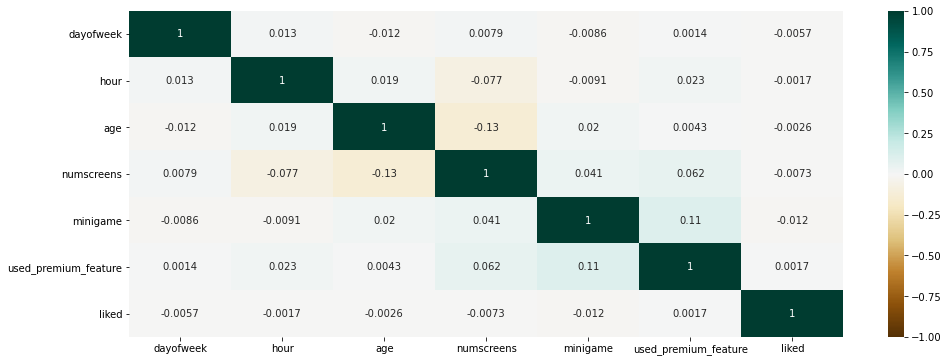

In [42]:
plt.figure(figsize=(16, 6))
sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [48]:
df['difference'] = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

In [49]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


Text(0.5, 1.0, 'Distributions of Time to Enrolled')

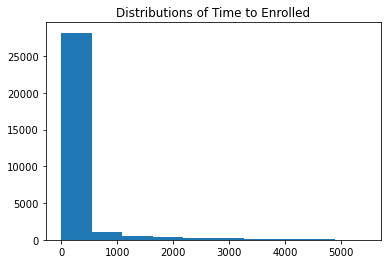

In [51]:
plt.hist(df.difference.dropna())
plt.title('Distributions of Time to Enrolled')

Text(0.5, 1.0, 'Distributions of Time to Enrolled (0-100 Hours)')

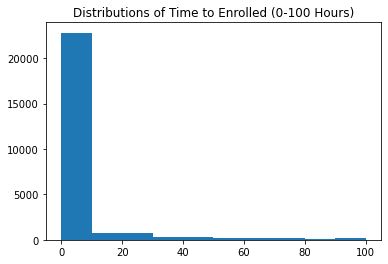

In [54]:
plt.hist(df.difference.dropna(), range=[0, 100])
plt.title('Distributions of Time to Enrolled (0-100 Hours)')

In [56]:
df.loc[df.difference > 48, 'enrolled'] = 0

In [57]:
df.drop(columns = ['difference', 'enrolled_date', 'first_open'], axis=1, inplace=True)
df

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [58]:
topscreens = pd.read_csv('top_screens.csv').top_screens.values
topscreens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [62]:
df.screen_list = df.screen_list.astype(str) + ','
for sc in topscreens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+',', '')

In [63]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,",,",3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df['Other'] = df.screen_list.str.count(',')

In [67]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,9
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,254414,1,19,23,",,",3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,12


In [68]:
df.drop(['screen_list'], axis=1, inplace=True)

In [70]:
savings_screen = ['Saving1',
                 'Saving2',
                 'Saving2Amount',
                 'Saving4',
                 'Saving5',
                 'Saving6',
                 'Saving7',
                 'Saving8',
                 'Saving9',
                 'Saving10']
df['SavingsCount'] = df[savings_screen].sum(axis=1)
df.drop(savings_screen, axis=1, inplace=True)
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,9,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,2,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,1,0,0,0,0,0,0,8,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,15,0


In [71]:
credit_screen = ['Credit1',
                 'Credit2',
                 'Credit3',
                 'Credit3Container',
                 'Credit3Dashboard']
df['CreditCount'] = df[credit_screen].sum(axis=1)
df.drop(credit_screen, axis=1, inplace=True)
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CreditCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,9,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,7,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,2,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,8,0,3
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,12,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,1,0,0,0,0,0,0,8,0,2
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,3,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,15,0,0


In [72]:
cc_screen = ['CC1',
                 'CC1Category',
                 'CC3']
df['CCCount'] = df[cc_screen].sum(axis=1)
df.drop(cc_screen, axis=1, inplace=True)
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CreditCount,CCCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,9,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,7,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,2,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,8,0,3,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,12,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,0,8,0,2,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,3,0,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,15,0,0,0


In [73]:
loan_screen = ['Loan',
                 'Loan2',
                 'Loan3',
                 'Loan4']
df['LoanCount'] = df[loan_screen].sum(axis=1)
df.drop(loan_screen, axis=1, inplace=True)
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CreditCount,CCCount,LoanCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,7,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,2,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,8,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,12,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,8,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,3,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,8,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,15,0,0,0,0


In [74]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingsCount', 'CreditCount', 'CCCount', 'LoanCount'],
      dtype='object')

In [75]:
df.to_csv('new_df.csv', index=False)